# Assigment Python 2

## Data Set: New York City Property Sales [September 2016 - September 2017]

**Sumber Data:** https://www.kaggle.com/datasets/new-york-city/nyc-property-sale

## About Dataset
**Context**

This dataset is a record of every building or building unit (apartment, etc.) sold in the New York City property market over a 12-month period.

**Content**

This dataset contains the location, address, type, sale price, and sale date of building units sold. A reference on the trickier fields:
* BOROUGH: A digit code for the borough the property is located in; in order these are Manhattan (1), Bronx (2), Brooklyn (3), Queens (4), and Staten Island (5).
* BLOCK; LOT: The combination of borough, block, and lot forms a unique key for property in New York City. Commonly called a BBL.
* BUILDING CLASS AT PRESENT and BUILDING CLASS AT TIME OF SALE: The type of building at various points in time. See the glossary linked to below.

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
from scipy import stats
import scipy.stats as scistats
import statsmodels.api as sm
import math
import statistics
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

Masukan data terlebih dahulu

In [2]:
nyc = pd.read_csv('D:/Python for Data Science/Data/nyc-rolling-sales.csv', skipinitialspace = True)

## Eksplorasi Data

Melihat berapa jumlah baris dan kolom

In [3]:
nyc.shape

(84548, 22)

Hasil di atas menunjukkan bahwa dataset tersebut memiliki 84548 baris dan 22 kolom.

Mengganti kode area 1 dengan manhattan, 2 dengan bronx, 3 dengan brooklyn, 4 dengan queens, dan 5 dengan staten islands

In [4]:
nyc['BOROUGH'] = nyc.BOROUGH.replace({1: "Manhattan", 2: "Bronx", 3: "Brooklyn", 4: "Queens", 5: "Staten Islands"})
nyc.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,NaN,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,NaN,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,NaN,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,NaN,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,NaN,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


Melihat lima baris pertama

Melihat lima baris terakhir

In [5]:
nyc.tail()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
84543,8409,Staten Islands,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,NaN,B9,37 QUAIL LANE,...,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,8410,Staten Islands,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,NaN,B9,32 PHEASANT LANE,...,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,8411,Staten Islands,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,NaN,B2,49 PITNEY AVENUE,...,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,8412,Staten Islands,WOODROW,22 STORE BUILDINGS,4,7100,28,NaN,K6,2730 ARTHUR KILL ROAD,...,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00
84547,8413,Staten Islands,WOODROW,35 INDOOR PUBLIC AND CULTURAL FACILITIES,4,7105,679,NaN,P9,155 CLAY PIT ROAD,...,0,1,1,10796,2400,2006,4,P9,69300,2016-10-27 00:00:00


Melihat ringkasan data

In [6]:
nyc.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,84548.0,10344.359878,7151.779436,4.0,4231.00,8942.0,15987.25,26739.0
BLOCK,84548.0,4237.218976,3568.263407,1.0,1322.75,3311.0,6281.00,16322.0
LOT,84548.0,376.224015,658.136814,1.0,22.00,50.0,1001.00,9106.0
EASE-MENT,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ZIP CODE,84548.0,10731.991614,1290.879147,0.0,10305.00,11209.0,11357.00,11694.0
RESIDENTIAL UNITS,84548.0,2.025264,16.721037,0.0,0.00,1.0,2.00,1844.0
COMMERCIAL UNITS,84548.0,0.193559,8.713183,0.0,0.00,0.0,0.00,2261.0
TOTAL UNITS,84548.0,2.249184,18.972584,0.0,1.00,1.0,2.00,2261.0
YEAR BUILT,84548.0,1789.322976,537.344993,0.0,1920.00,1940.0,1965.00,2017.0
TAX CLASS AT TIME OF SALE,84548.0,1.657485,0.819341,1.0,1.00,2.0,2.00,4.0


In [7]:
nyc.describe(include = 'O').transpose()

,count,unique,top,freq
BOROUGH,84548,5,Queens,26736
NEIGHBORHOOD,84548,254,FLUSHING-NORTH,3068
BUILDING CLASS CATEGORY,84548,47,01 ONE FAMILY DWELLINGS,18235
TAX CLASS AT PRESENT,83810,10,1,38633
BUILDING CLASS AT PRESENT,83810,166,D4,12663
ADDRESS,84548,67563,131-05 40TH ROAD,210
APARTMENT NUMBER,19052,3988,4,298
LAND SQUARE FEET,84548,6062,-,26252
GROSS SQUARE FEET,84548,5691,-,27612
BUILDING CLASS AT TIME OF SALE,84548,166,R4,12989


## Data Cleaning

Melihat tipe data pada dataset

In [8]:
nyc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      84548 non-null  int64  
 1   BOROUGH                         84548 non-null  object 
 2   NEIGHBORHOOD                    84548 non-null  object 
 3   BUILDING CLASS CATEGORY         84548 non-null  object 
 4   TAX CLASS AT PRESENT            83810 non-null  object 
 5   BLOCK                           84548 non-null  int64  
 6   LOT                             84548 non-null  int64  
 7   EASE-MENT                       0 non-null      float64
 8   BUILDING CLASS AT PRESENT       83810 non-null  object 
 9   ADDRESS                         84548 non-null  object 
 10  APARTMENT NUMBER                19052 non-null  object 
 11  ZIP CODE                        84548 non-null  int64  
 12  RESIDENTIAL UNITS               

Dari hasil di atas, datset tersebut memiliki 10 tipe data integer dan 12 data objek

Melihat kolom data

In [9]:
nyc.columns

Index(['Unnamed: 0', 'BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER', 'ZIP CODE',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE'],
      dtype='object')

Melihat apakah terdapat missing value

In [10]:
nyc.isna().sum()

Unnamed: 0                            0
BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                738
BLOCK                                 0
LOT                                   0
EASE-MENT                         84548
BUILDING CLASS AT PRESENT           738
ADDRESS                               0
APARTMENT NUMBER                  65496
ZIP CODE                              0
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                      0
GROSS SQUARE FEET                     0
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                            0
SALE DATE                             0
dtype: int64

Dari hasil di atas bisa dilihat bahwa terdapat missing value pada colom 'TAX CLASS AT PRESENT', 'EASE-MENT', 'BUILDING CLASS AT PRESENT', dan 'APARTMENT NUMBER'.

In [11]:
for col in nyc.columns:
    print("UNIQUE VALUES FOR ",col)
    print("="*40)
    print(nyc[col].unique())
    print("="*40)

UNIQUE VALUES FOR  Unnamed: 0
[    4     5     6 ... 26737 26738 26739]
UNIQUE VALUES FOR  BOROUGH
['Manhattan' 'Bronx' 'Brooklyn' 'Queens' 'Staten Islands']
UNIQUE VALUES FOR  NEIGHBORHOOD
['ALPHABET CITY' 'CHELSEA' 'CHINATOWN' 'CIVIC CENTER' 'CLINTON'
 'EAST VILLAGE' 'FASHION' 'FINANCIAL' 'FLATIRON' 'GRAMERCY'
 'GREENWICH VILLAGE-CENTRAL' 'GREENWICH VILLAGE-WEST' 'HARLEM-CENTRAL'
 'HARLEM-EAST' 'HARLEM-UPPER' 'HARLEM-WEST' 'INWOOD' 'JAVITS CENTER'
 'KIPS BAY' 'LITTLE ITALY' 'LOWER EAST SIDE' 'MANHATTAN VALLEY'
 'MIDTOWN CBD' 'MIDTOWN EAST' 'MIDTOWN WEST' 'MORNINGSIDE HEIGHTS'
 'MURRAY HILL' 'ROOSEVELT ISLAND' 'SOHO' 'SOUTHBRIDGE' 'TRIBECA'
 'UPPER EAST SIDE (59-79)' 'UPPER EAST SIDE (79-96)'
 'UPPER EAST SIDE (96-110)' 'UPPER WEST SIDE (59-79)'
 'UPPER WEST SIDE (79-96)' 'UPPER WEST SIDE (96-116)'
 'WASHINGTON HEIGHTS LOWER' 'WASHINGTON HEIGHTS UPPER' 'BATHGATE'
 'BAYCHESTER' 'BEDFORD PARK/NORWOOD' 'BELMONT' 'BRONX PARK' 'BRONXDALE'
 'CASTLE HILL/UNIONPORT' 'CITY ISLAND' 'CITY ISLAND

In [12]:
nyc = nyc[(nyc["LAND SQUARE FEET"] != 0) & 
            (nyc["GROSS SQUARE FEET"] != 0) & 
            (nyc["YEAR BUILT"] != 0) & 
            (nyc["SALE PRICE"] != 0) & 
            (nyc["TOTAL UNITS"] != 0)
           ]

In [13]:
nyc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60714 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      60714 non-null  int64  
 1   BOROUGH                         60714 non-null  object 
 2   NEIGHBORHOOD                    60714 non-null  object 
 3   BUILDING CLASS CATEGORY         60714 non-null  object 
 4   TAX CLASS AT PRESENT            60714 non-null  object 
 5   BLOCK                           60714 non-null  int64  
 6   LOT                             60714 non-null  int64  
 7   EASE-MENT                       0 non-null      float64
 8   BUILDING CLASS AT PRESENT       60714 non-null  object 
 9   ADDRESS                         60714 non-null  object 
 10  APARTMENT NUMBER                15083 non-null  object 
 11  ZIP CODE                        60714 non-null  int64  
 12  RESIDENTIAL UNITS               

Mengganti 0 di YEAR BUILT dengan np.nan

In [14]:
nyc['YEAR BUILT'].replace(0, np.nan, inplace=True)

Menghapus kolom 'Unnamed: 0' karena tidak related dengan proses analitis

In [15]:
nyc.drop("Unnamed: 0", axis = 1, inplace = True)

Menghapus kolom 'EASE-MENT' karena tidak memiliki informasi/nilai

In [16]:
nyc.drop('EASE-MENT', axis = 1, inplace = True)

Menghapus kolom-kolom yang tidak relevan dengan analisis data statistik

In [17]:
nyc.drop(labels=['ADDRESS','APARTMENT NUMBER', 'ZIP CODE'], axis=1, inplace=True)

In [18]:
nyc['SALE PRICE']= pd.to_numeric(nyc['SALE PRICE'], errors='coerce')

Menjadikan 'LAND SQUARE FEET' dan 'GROSS SQUARE FEET' sebagai numeric

In [19]:
nyc['LAND SQUARE FEET'] = pd.to_numeric(nyc['LAND SQUARE FEET'], errors='coerce')
nyc['GROSS SQUARE FEET'] = pd.to_numeric(nyc['GROSS SQUARE FEET'], errors='coerce')

Menjadikan kolom SALE DATE sebagai datetime

In [20]:
nyc['SALE DATE']=pd.to_datetime(nyc['SALE DATE'], errors='coerce')

Menjadikan kolom berikut sebagai kategorikal

In [21]:
categorical = ['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT', 'BUILDING CLASS AT PRESENT',
               'BUILDING CLASS AT TIME OF SALE', 'TAX CLASS AT TIME OF SALE', 'YEAR BUILT']
for col in categorical:
    nyc[col] = nyc[col].astype('category')

In [22]:
nyc = nyc[nyc['LAND SQUARE FEET'].notnull()]
nyc = nyc[nyc['GROSS SQUARE FEET'].notnull()]
nyc = nyc[nyc['SALE PRICE'].notnull()]

In [23]:
nyc.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19
3,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23
4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,6,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17
6,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,C4,8,0,8,1750.0,4226.0,1920,2,C4,3192840.0,2016-09-23
9,Manhattan,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,D9,24,0,24,4489.0,18523.0,1920,2,D9,16232000.0,2016-11-07


## Mengecek Duplikat

Menghitung jumlah duplikat pada baris

In [24]:
sum(nyc.duplicated())

335

In [25]:
nyc[nyc.duplicated()]

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
208,Manhattan,CHELSEA,01 ONE FAMILY DWELLINGS,1,772,29,A4,1,0,1,1588.0,5653.0,1900,1,A4,10.0,2017-01-30
209,Manhattan,CHELSEA,01 ONE FAMILY DWELLINGS,1,772,29,A4,1,0,1,1588.0,5653.0,1900,1,A4,10.0,2017-01-30
4173,Manhattan,GREENWICH VILLAGE-WEST,01 ONE FAMILY DWELLINGS,1,585,69,A5,1,0,1,384.0,1152.0,1901,1,A5,1375000.0,2016-10-07
5005,Manhattan,HARLEM-CENTRAL,08 RENTALS - ELEVATOR APARTMENTS,2,1737,25,D3,771,0,771,189025.0,555954.0,1959,2,D3,5020000.0,2016-11-07
5006,Manhattan,HARLEM-CENTRAL,08 RENTALS - ELEVATOR APARTMENTS,2,1737,25,D3,771,0,771,189025.0,555954.0,1959,2,D3,5020000.0,2016-11-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83176,Staten Islands,TODT HILL,01 ONE FAMILY DWELLINGS,1,908,150,A1,1,0,1,38862.0,3900.0,1920,1,A1,1125000.0,2017-08-02
83207,Staten Islands,TOMPKINSVILLE,02 TWO FAMILY DWELLINGS,1,114,30,B2,2,0,2,5781.0,844.0,1942,1,B2,250000.0,2017-06-22
83603,Staten Islands,WEST NEW BRIGHTON,01 ONE FAMILY DWELLINGS,1,91,31,A1,1,0,1,4840.0,2400.0,2005,1,A1,585000.0,2016-09-21
83647,Staten Islands,WEST NEW BRIGHTON,01 ONE FAMILY DWELLINGS,1,155,180,A1,1,0,1,10671.0,2464.0,1899,1,A1,725000.0,2017-06-30


Menghapus baris yang duplikat

In [26]:
nyc.drop_duplicates(subset = nyc.columns, keep='first', inplace=True)

nyc.shape

(41089, 17)

Kategorikan kolom data sesuai dengan tipe data

In [27]:
nyc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41089 entries, 0 to 84547
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         41089 non-null  category      
 1   NEIGHBORHOOD                    41089 non-null  category      
 2   BUILDING CLASS CATEGORY         41089 non-null  category      
 3   TAX CLASS AT PRESENT            41089 non-null  category      
 4   BLOCK                           41089 non-null  int64         
 5   LOT                             41089 non-null  int64         
 6   BUILDING CLASS AT PRESENT       41089 non-null  category      
 7   RESIDENTIAL UNITS               41089 non-null  int64         
 8   COMMERCIAL UNITS                41089 non-null  int64         
 9   TOTAL UNITS                     41089 non-null  int64         
 10  LAND SQUARE FEET                41089 non-null  float64       
 11  GR

In [28]:
categor = ['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT', 'BUILDING CLASS AT PRESENT',
           'BUILDING CLASS AT TIME OF SALE', 'TAX CLASS AT TIME OF SALE', 'YEAR BUILT']
floats= ['SALE PRICE', 'LAND SQUARE FEET', 'GROSS SQUARE FEET']
integer = ['BLOCK', 'LOT']

Menjadikan data kategori sebagai tipe data string

In [29]:
for col in categor:
    nyc[col] = nyc[col].astype('str')

Menjadikan kolom floats menjadi tipe data float

In [30]:
for col in floats:
    nyc[col] = nyc[col].astype('float64')

Menjadikan kolom integer menjadi tipe data integer

In [31]:
for col in integer:
    nyc[col] = nyc[col].astype('int64')

Melihat missing value

In [32]:
nyc.isnull().sum()

BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
BUILDING CLASS AT PRESENT         0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
dtype: int64

In [33]:
nyc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41089 entries, 0 to 84547
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         41089 non-null  object        
 1   NEIGHBORHOOD                    41089 non-null  object        
 2   BUILDING CLASS CATEGORY         41089 non-null  object        
 3   TAX CLASS AT PRESENT            41089 non-null  object        
 4   BLOCK                           41089 non-null  int64         
 5   LOT                             41089 non-null  int64         
 6   BUILDING CLASS AT PRESENT       41089 non-null  object        
 7   RESIDENTIAL UNITS               41089 non-null  int64         
 8   COMMERCIAL UNITS                41089 non-null  int64         
 9   TOTAL UNITS                     41089 non-null  int64         
 10  LAND SQUARE FEET                41089 non-null  float64       
 11  GR

Dari hasil di atas bisa dilihat bahwa dataset tersebut sudah tidak terdapat missing value.

## Descriptive Statistics

### Measures of Central Tendency

Untuk tahap ini kita akan melihat Measures of Central Tendency untuk tiap kolom 

#### Mean

In [34]:
mean_SALEPRICE = statistics.mean(nyc['SALE PRICE'])
mean_RESIDENTIALUNITS =statistics.mean(nyc['RESIDENTIAL UNITS'])
mean_TOTALUNITS =statistics.mean(nyc['TOTAL UNITS'])
mean_COMMERCIALUNITS =statistics.mean(nyc['COMMERCIAL UNITS'])
mean_LANDSQUAREFEET =statistics.mean(nyc['LAND SQUARE FEET'])
mean_GROSSSQUAREFEET =statistics.mean(nyc['GROSS SQUARE FEET'])

In [35]:
print('MEAN')
print("="*40)
print('SALE PRICE:', mean_SALEPRICE)
print('RESIDENTIAL UNITS:', mean_RESIDENTIALUNITS)
print('TOTAL UNITS:',mean_TOTALUNITS)
print('COMMERCIAL UNITS:', mean_COMMERCIALUNITS)
print('LAND SQUARE FEET:',mean_LANDSQUAREFEET)
print('GROSS SQUARE FEET:',mean_GROSSSQUAREFEET)
print("="*40)

MEAN
SALE PRICE: 1258914.4056073402
RESIDENTIAL UNITS: 2.8722042395775027
TOTAL UNITS: 3.1648859792158484
COMMERCIAL UNITS: 0.2759132614568376
LAND SQUARE FEET: 3547.3256589354814
GROSS SQUARE FEET: 4034.059845700796


#### Median

In [36]:
median_SALEPRICE = statistics.median(nyc['SALE PRICE'])
median_RESIDENTIALUNITS =statistics.median(nyc['RESIDENTIAL UNITS'])
median_TOTALUNITS =statistics.median(nyc['TOTAL UNITS'])
median_COMMERCIALUNITS =statistics.median(nyc['COMMERCIAL UNITS'])
median_LANDSQUAREFEET =statistics.median(nyc['LAND SQUARE FEET'])
median_GROSSSQUAREFEET =statistics.median(nyc['GROSS SQUARE FEET'])

In [37]:
print('MEDIAN')
print("="*40)
print('SALE PRICE:', median_SALEPRICE)
print('RESIDENTIAL UNITS:', median_RESIDENTIALUNITS)
print('TOTAL UNITS:',median_TOTALUNITS)
print('COMMERCIAL UNITS:', median_COMMERCIALUNITS)
print('LAND SQUARE FEET:',median_LANDSQUAREFEET)
print('GROSS SQUARE FEET:',median_GROSSSQUAREFEET)
print("="*40)

MEDIAN
SALE PRICE: 520000.0
RESIDENTIAL UNITS: 1
TOTAL UNITS: 2
COMMERCIAL UNITS: 0
LAND SQUARE FEET: 2375.0
GROSS SQUARE FEET: 1836.0


#### Mode

In [38]:
mode_BOROUGH = statistics.mode(nyc['BOROUGH'])
mode_NEIGHBORHOOD = statistics.mode(nyc['NEIGHBORHOOD'])
mode_TAXCLASSATPRESENT = statistics.mode(nyc['TAX CLASS AT PRESENT'])
mode_BUILDINGCLASSCATEGORY = statistics.mode(nyc['BUILDING CLASS CATEGORY'])

In [39]:
print('MODE')
print("="*40)
print('BOROUGH:',mode_BOROUGH)
print('NEIGHBORHOOD:',mode_NEIGHBORHOOD)
print('TAX CLASS AT PRESENT:',mode_TAXCLASSATPRESENT)
print('BUILDING CLASS CATEGORY:',mode_BUILDINGCLASSCATEGORY)

MODE
BOROUGH: Brooklyn
NEIGHBORHOOD: BEDFORD STUYVESANT
TAX CLASS AT PRESENT: 1
BUILDING CLASS CATEGORY: 01 ONE FAMILY DWELLINGS                    


### Measures of Variability

Untuk tahap ini kita akan melihat Measures of Variability untuk tiap kolom

#### Variances

Berikutnya adalah melihat nilai variance dengan menggunakan funsgi statistics.variance()

In [40]:
var_SALEPRICE = statistics.variance(nyc['SALE PRICE'])
var_LANDSQUAREFEET = statistics.variance(nyc['LAND SQUARE FEET'])
var_LANDSQUAREFEET = statistics.variance(nyc['LAND SQUARE FEET'])

In [41]:
print('VARIANCE')
print("="*40)
print('SALE PRICE:', var_SALEPRICE)
print('LAND SQUARE FEET:', var_LANDSQUAREFEET)
print('LAND SQUARE FEET:', var_LANDSQUAREFEET)
print("="*40)

VARIANCE
SALE PRICE: 206766591860143.16
LAND SQUARE FEET: 852812301.0355178
LAND SQUARE FEET: 852812301.0355178


#### Standard Deviation

Setelah mendapatkan nilai variance, menghitung nilai standard deviation dengan menggunakan fungsi statistics.stdev()

In [42]:
std_SALEPRICE = statistics.stdev(nyc['SALE PRICE'])
std_LANDSQUAREFEET = statistics.stdev(nyc['LAND SQUARE FEET'])
std_LANDSQUAREFEET = statistics.stdev(nyc['LAND SQUARE FEET'])

In [43]:
print('STANDARD DEVIATION')
print("="*40)
print('SALE PRICE:', std_SALEPRICE)
print('LAND SQUARE FEET:', std_LANDSQUAREFEET)
print('LAND SQUARE FEET:', std_LANDSQUAREFEET)
print("="*40)

STANDARD DEVIATION
SALE PRICE: 14379380.788481232
LAND SQUARE FEET: 29202.950211160478
LAND SQUARE FEET: 29202.950211160478


#### Ranges

Selanjutnya melihat perbedaan anatara elemen maksimum dan minimum dengan fungsi np.ptp()

In [44]:
range_SALEPRICE = np.ptp(nyc['SALE PRICE'])
range_LANDSQUAREFEET = np.ptp(nyc['LAND SQUARE FEET'])
range_LANDSQUAREFEET = np.ptp(nyc['LAND SQUARE FEET'])

In [45]:
print('RANGES')
print("="*40)
print('SALE PRICE:', range_SALEPRICE)
print('LAND SQUARE FEET:', range_LANDSQUAREFEET)
print('LAND SQUARE FEET:', range_LANDSQUAREFEET)
print("="*40)

RANGES
SALE PRICE: 2210000000.0
LAND SQUARE FEET: 4228300.0
LAND SQUARE FEET: 4228300.0


## Analisis Descriptive LAND SQUARE FEET, GROSS SQUARE FEET, SALE PRICE untuk Setiap BOROUGH

Melihat Mean LAND SQUARE FEET, GROSS SQUARE FEET, SALE PRICE untuk masing-masing wilayah 

In [46]:
mean_ = nyc.groupby(['BOROUGH'])[['LAND SQUARE FEET', 'GROSS SQUARE FEET', 'SALE PRICE']].mean()
mean_

,LAND SQUARE FEET,GROSS SQUARE FEET,SALE PRICE
BOROUGH,,,
Bronx,4656.466242,5933.011767,7.210653e+05
Brooklyn,2331.743152,3100.116821,8.899375e+05
Manhattan,5309.681250,34128.036458,1.929664e+07
Queens,3949.249252,2913.573461,9.074128e+05
Staten Islands,5744.675402,2298.129045,5.272380e+05


In [47]:
mean_saleprice = nyc.groupby(['BOROUGH'])[['SALE PRICE']].mean()
mean_saleprice

,SALE PRICE
BOROUGH,
Bronx,7.210653e+05
Brooklyn,8.899375e+05
Manhattan,1.929664e+07
Queens,9.074128e+05
Staten Islands,5.272380e+05


<Axes: xlabel='BOROUGH'>

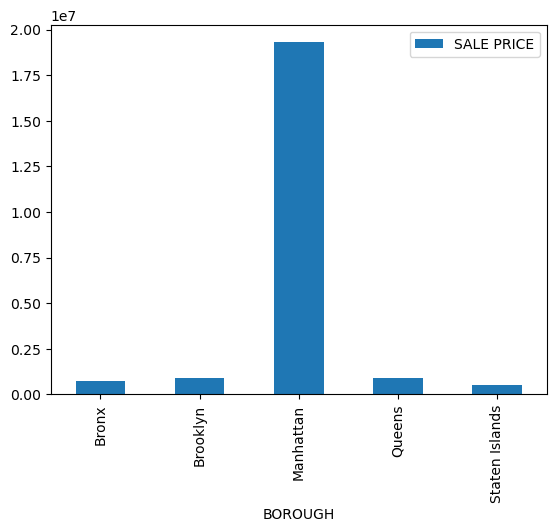

In [48]:
mean_saleprice.plot(kind='bar')

Dari tabel di atas dapat dilihat nilai rata-rata dalam luas tanah, luas bangunan, dan harga penjualan properti di masing-masing borough di New York City. Manhattan memiliki rata-rata harga penjualan yang jauh lebih tinggi dibandingkan dengan borough lainnya, sementara Staten Islands memiliki rata-rata harga penjualan yang lebih rendah. 

Melihat Median LAND SQUARE FEET, GROSS SQUARE FEET, SALE PRICE untuk masing-masing wilayah 

In [49]:
median_ = nyc.groupby(['BOROUGH'])[['LAND SQUARE FEET', 'GROSS SQUARE FEET', 'SALE PRICE']].median()
median_

,LAND SQUARE FEET,GROSS SQUARE FEET,SALE PRICE
BOROUGH,,,
Bronx,2500.0,2164.0,371387.0
Brooklyn,2000.0,1996.0,480000.0
Manhattan,2469.0,7527.5,6500000.0
Queens,2772.0,1616.0,635000.0
Staten Islands,3400.0,1541.0,485000.0


In [50]:
median_saleprice = nyc.groupby(['BOROUGH'])[['SALE PRICE']].median()
median_saleprice

,SALE PRICE
BOROUGH,
Bronx,371387.0
Brooklyn,480000.0
Manhattan,6500000.0
Queens,635000.0
Staten Islands,485000.0


<Axes: xlabel='BOROUGH'>

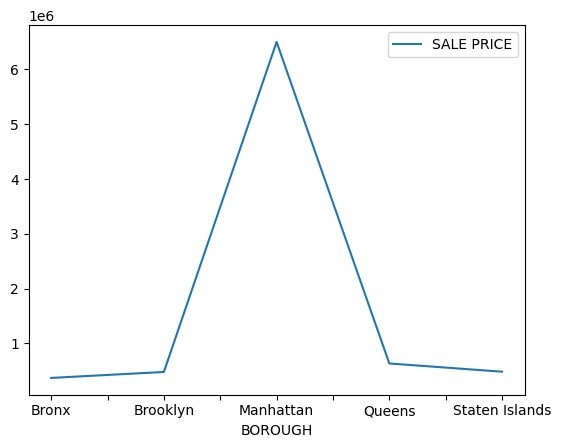

In [51]:
median_saleprice.plot(kind='line')

Dari tabel di atas dapat dilihat nilai tengah atau median dalam luas tanah, luas bangunan, dan harga penjualan properti di masing-masing borough di New York City. Manhattan memiliki median harga penjualan yang jauh lebih tinggi dibandingkan dengan borough lainnya, sementara Brooklyn dan Queens memiliki median harga penjualan yang lebih rendah.

Melihat Range LAND SQUARE FEET, GROSS SQUARE FEET, SALE PRICE untuk masing-masing wilayah 

In [52]:
range_ = nyc.groupby(['BOROUGH'])[['LAND SQUARE FEET', 'GROSS SQUARE FEET', 'SALE PRICE']].agg(np.ptp)
range_

,LAND SQUARE FEET,GROSS SQUARE FEET,SALE PRICE
BOROUGH,,,
Bronx,679000.0,1303935.0,1.100000e+08
Brooklyn,970000.0,1330743.0,1.542500e+08
Manhattan,188641.0,1616884.0,2.210000e+09
Queens,4228100.0,3750365.0,2.575000e+08
Staten Islands,2128599.0,682960.0,1.190000e+07


Dari tabel di atas dapat dilihat sebaran atau variasi dalam luas tanah, luas bangunan, dan harga penjualan properti di masing-masing borough di New York City. Manhattan memiliki rentang harga penjualan yang sangat besar, sementara Bronx, Brooklyn, dan Queens memiliki rentang yang lebih kecil dalam harga penjualan. Queens memiliki rentang luas tanah dan luas bangunan yang besar, sedangkan Staten Island memiliki rentang luas tanah yang besar. 

Melihat Variance LAND SQUARE FEET, GROSS SQUARE FEET, SALE PRICE untuk masing-masing wilayah 

In [53]:
varian_ = nyc.groupby(['BOROUGH'])[['LAND SQUARE FEET', 'GROSS SQUARE FEET', 'SALE PRICE']].var()
varian_

,LAND SQUARE FEET,GROSS SQUARE FEET,SALE PRICE
BOROUGH,,,
Bronx,4.112012e+08,1.118864e+09,1.014319e+13
Brooklyn,8.535557e+07,2.753211e+08,1.156756e+13
Manhattan,1.311041e+08,1.176257e+10,8.082665e+15
Queens,1.647597e+09,1.394512e+09,1.376715e+13
Staten Islands,2.568055e+09,2.278792e+08,2.180988e+11


Dari hasil di atas dapat diketahui bahwa
1. LAND SQUARE FEET (Luas Tanah dalam Kaki Persegi): Staten Island memiliki varians luas tanah tertinggi sebesar 2,568,054,679, sedangkan Brooklyn memiliki varians luas tanah terendah sebesar 85,355,569.
2. GROSS SQUARE FEET (Luas Bangunan dalam Kaki Persegi): Manhattan memiliki varians luas bangunan tertinggi sebesar  1,394,511,921, sedangkan Staten Islands memiliki varians luas bangunan terendah sebesar 227,879,218.
3. SALE PRICE (Harga Penjualan): Manhattan memiliki varians harga penjualan yang sangat tinggi yaitu 8,082,664,831,348,758, sedangkan Staten Island memiliki varians harga penjualan terendah dari semua borough sebesar 218,098,842,650.

Melihat Standard Deviation LAND SQUARE FEET, GROSS SQUARE FEET, SALE PRICE untuk masing-masing wilayah 

In [54]:
Standard_Deviation = nyc.groupby(['BOROUGH'])[['LAND SQUARE FEET', 'GROSS SQUARE FEET', 'SALE PRICE']].std()
Standard_Deviation

,LAND SQUARE FEET,GROSS SQUARE FEET,SALE PRICE
BOROUGH,,,
Bronx,20278.096246,33449.418388,3.184837e+06
Brooklyn,9238.807795,16592.802702,3.401111e+06
Manhattan,11450.068059,108455.392567,8.990364e+07
Queens,40590.603100,37343.164315,3.710411e+06
Staten Islands,50675.977339,15095.668833,4.670105e+05


Dari tabel di atas, dapat dilihat sebaran atau keragaman data dalam luas tanah, luas bangunan, dan harga penjualan properti di masing-masing borough di New York City. Manhattan memiliki deviasi standar yang tinggi dalam luas bangunan dan harga penjualan, sementara Bronx, Brooklyn, dan Queens memiliki deviasi standar yang lebih rendah dalam harga penjualan. Staten Island memiliki deviasi standar yang rendah dalam luas bangunan dan harga penjualan.

## Probability Distribution

In [55]:
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import numpy as np
import random
import warnings
import matplotlib.pyplot as plt
%matplotlib inline

sns.set(rc={'figure.figsize':(13, 7.5)})
sns.set_context('talk')

### LAND SQUARE FEET

In [56]:
a = nyc[(nyc['LAND SQUARE FEET'] > 200000) & (nyc['LAND SQUARE FEET'] < 5000000)]

In [57]:
for col in floats:
    a[col] = a[col].astype('float64')

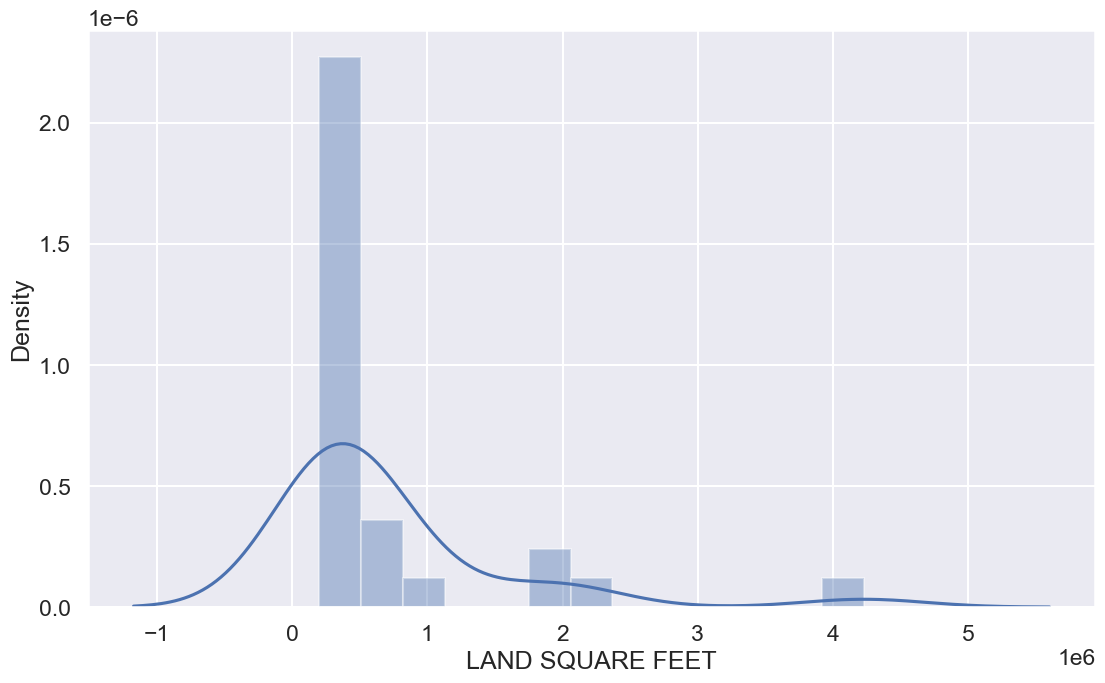

In [58]:
sns.distplot(a['LAND SQUARE FEET']);

In [59]:
from scipy.stats import shapiro
data = a['LAND SQUARE FEET']

stat, p = shapiro(data)
print('stat=%.3f, p=%.3f' % (stat, p))

if p > 0.05:
    print('Normal Distribution')
    
else:
    print('Non-Normal Distribution')

stat=0.607, p=0.000
Non-Normal Distribution


Dari plot dan Uji Shapiro-Wilk Normality Test diketahui bahwa LAND SQUARE FEET berdistribusi tidak normal.

### SALE PRICE

In [60]:
b = nyc[(nyc['SALE PRICE'] > 200000) & (nyc['SALE PRICE'] < 5000000)]

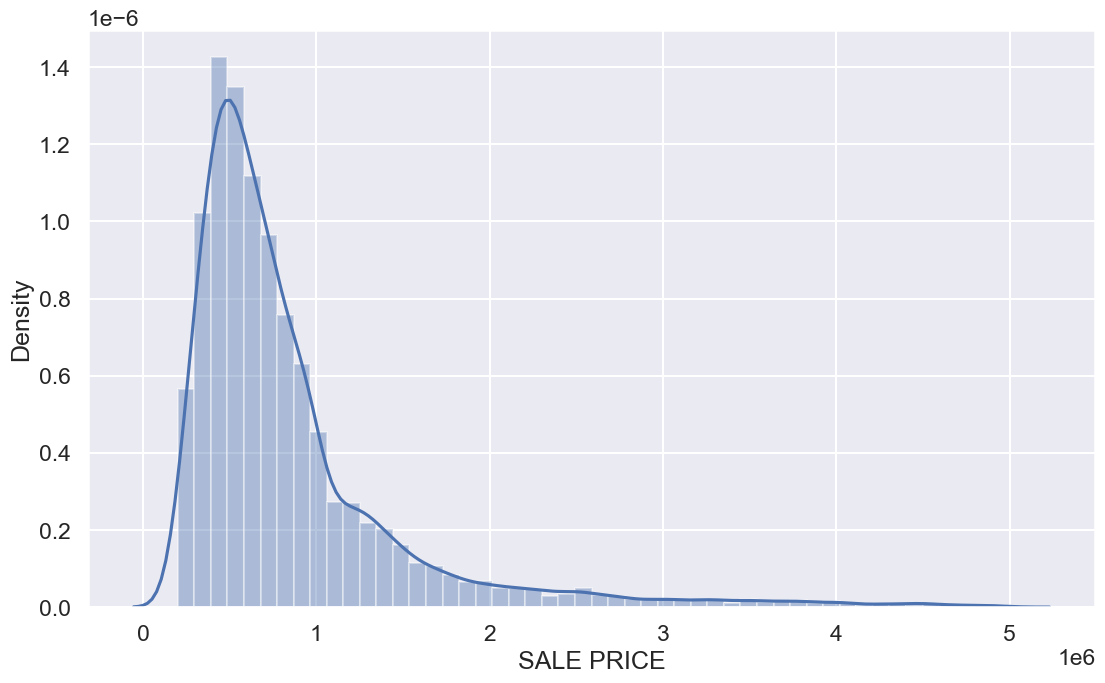

In [61]:
sns.distplot(b['SALE PRICE']);

In [62]:
# Shapiro-Wilk Normality Test for LAND SQUARE FEET
from scipy.stats import shapiro
data = b['SALE PRICE']

stat, p = shapiro(data)
print('stat=%.3f, p=%.3f' % (stat, p))

if p > 0.05:
    print('Normal Distribution')
    
else:
    print('Non-Normal Distribution')

stat=0.719, p=0.000
Non-Normal Distribution


Dari plot di atas dapat dilihat bahwa kemencengan data ke arah kanan (condong positif) yang berarti nilai mean lebih dari median sehingga data tersebut tidak berdistribusi normal.

### GROSS SQUARE FEET	

In [63]:
c = nyc[(nyc['GROSS SQUARE FEET'] > 200000) & (nyc['GROSS SQUARE FEET'] < 5000000)]

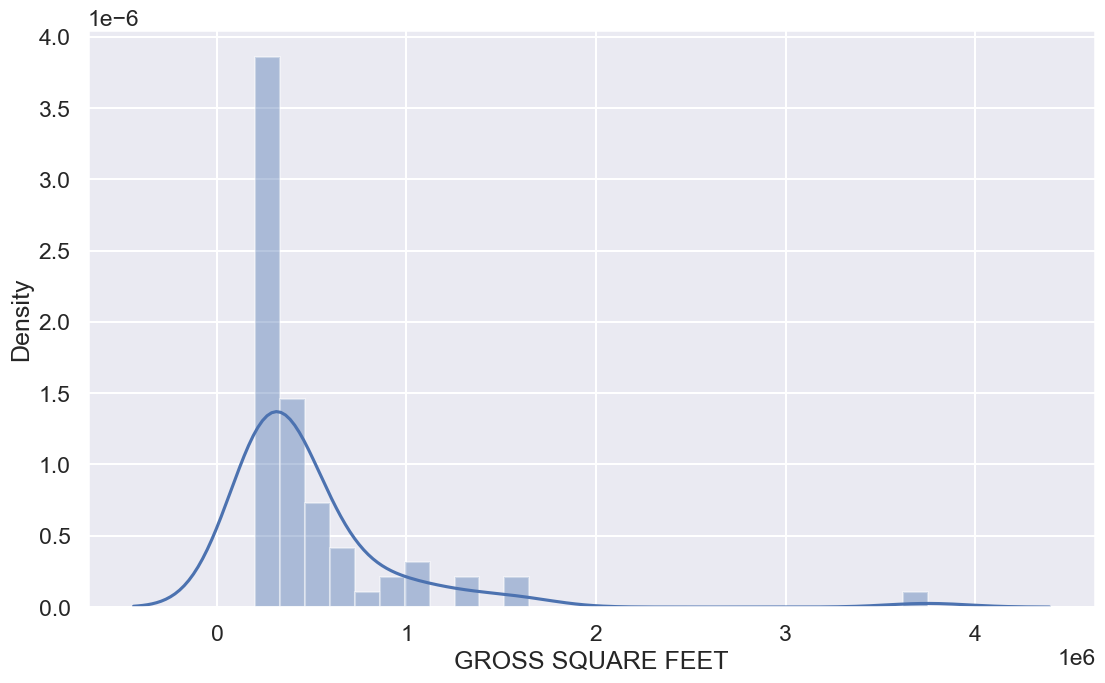

In [64]:
sns.distplot(c['GROSS SQUARE FEET']);

In [65]:
# Shapiro-Wilk Normality Test for LAND SQUARE FEET
from scipy.stats import shapiro
data = c['GROSS SQUARE FEET']

stat, p = shapiro(data)
print('stat=%.3f, p=%.3f' % (stat, p))

if p > 0.05:
    print('Normal Distribution')
    
else:
    print('Non-Normal Distribution')

stat=0.551, p=0.000
Non-Normal Distribution


## Confidance Interval

Menampilkan mean, standard deviation, dan population size dari SALE PRICE

In [66]:
ci=nyc.groupby("BOROUGH").agg({"SALE PRICE": [np.mean, np.std, np.size]})
ci

SALE PRICE                     
                        mean           std   size
BOROUGH                                          
Bronx           7.210653e+05  3.184837e+06   5184
Brooklyn        8.899375e+05  3.401111e+06  18875
Manhattan       1.929664e+07  8.990364e+07    960
Queens          9.074128e+05  3.710411e+06  11033
Staten Islands  5.272380e+05  4.670105e+05   5037

Mengekstrak parameter yang diperlukan

In [67]:
mean_sp = ci.iloc[0,0]
sd = ci.iloc [0,1]
n = ci.iloc [0,2]         
z = 1.96    

Menghitung standard error menggunakan formula untuk standard error dari mean

In [68]:
se = sd / np.sqrt(n)

Membangun CI

In [69]:
lcb = mean_sp - z * se
ucb = mean_sp + z * se
lcb, ucb

(634366.9474792236, 807763.6481997888)

Artinya rata-rata sebenarnya dari SALE PRICE di Manhattan akan jatuh antara 634366.94747922367 dan 807763.6481997888

## Hypothesis Testing

### Normality Test

**Hipotesis**
* H0: Data berdistribusi normal
* H1: Data tidak berdistribusi normal

#### D'Agostino's K^2 Test

In [70]:
from scipy.stats import normaltest
data = nyc['GROSS SQUARE FEET']

stat, p = normaltest(data)
print('stat=%.3f, p=%.3f' % (stat, p))

if p > 0.05:
    print('Normal Distribution')    
else:
    print('Non-Normal Distribution')

stat=138333.998, p=0.000
Non-Normal Distribution


In [71]:
from scipy.stats import normaltest
data = nyc['SALE PRICE']

stat, p = normaltest(data)
print('stat=%.3f, p=%.3f' % (stat, p))

if p > 0.05:
    print('Normal Distribution')    
else:
    print('Non-Normal Distribution')

stat=165623.698, p=0.000
Non-Normal Distribution


In [72]:
from scipy.stats import normaltest
data = nyc['LAND SQUARE FEET']

stat, p = normaltest(data)
print('stat=%.3f, p=%.3f' % (stat, p))

if p > 0.05:
    print('Normal Distribution')    
else:
    print('Non-Normal Distribution')

stat=162459.177, p=0.000
Non-Normal Distribution


## Corelation Tests

In [73]:
nyc.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19
3,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23
4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,6,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17
6,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,C4,8,0,8,1750.0,4226.0,1920,2,C4,3192840.0,2016-09-23
9,Manhattan,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,D9,24,0,24,4489.0,18523.0,1920,2,D9,16232000.0,2016-11-07


In [74]:
nyc['BOROUGH'] = nyc.BOROUGH.replace({"Manhattan": 1, "Bronx": 2, "Brooklyn": 3, "Queens": 4, "Staten Islands":5})
nyc.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,6,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17
6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,C4,8,0,8,1750.0,4226.0,1920,2,C4,3192840.0,2016-09-23
9,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,D9,24,0,24,4489.0,18523.0,1920,2,D9,16232000.0,2016-11-07


### Correlation Test

#### Pearson's Correlation Coefficient

**Hipotesis**
* H0: Tidak Terdapat Hubungan antar BOROUGH dan SALE PRICE
* H1: Terdapat Hubungan antar BOROUGH dan SALE PRICE

In [75]:
from scipy.stats import pearsonr
data1 = nyc['BOROUGH']
data2 = nyc['SALE PRICE']
stat, p = pearsonr(data1, data2)

print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Tidak Terdapat Hubungan antar BOROUGH dan SALE PRICE')
else:
    print('Terdapat Hubungan antar BOROUGH dan SALE PRICE')

stat=-0.079, p=0.000
Terdapat Hubungan antar BOROUGH dan SALE PRICE


#### Kendall's Rank Correlation

**Hipotesis**
* H0: Tidak Terdapat Hubungan antar BOROUGH dan SALE PRICE
* H1: Terdapat Hubungan antar BOROUGH dan SALE PRICE

In [76]:
from scipy.stats import kendalltau
data2 = nyc['SALE PRICE']
stat, p = kendalltau(data1, data2)

print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Tidak Terdapat Hubungan antar BOROUGH dan SALE PRICE')
else:
    print('Terdapat Hubungan antar BOROUGH dan SALE PRICE')

stat=0.066, p=0.000
Terdapat Hubungan antar BOROUGH dan SALE PRICE


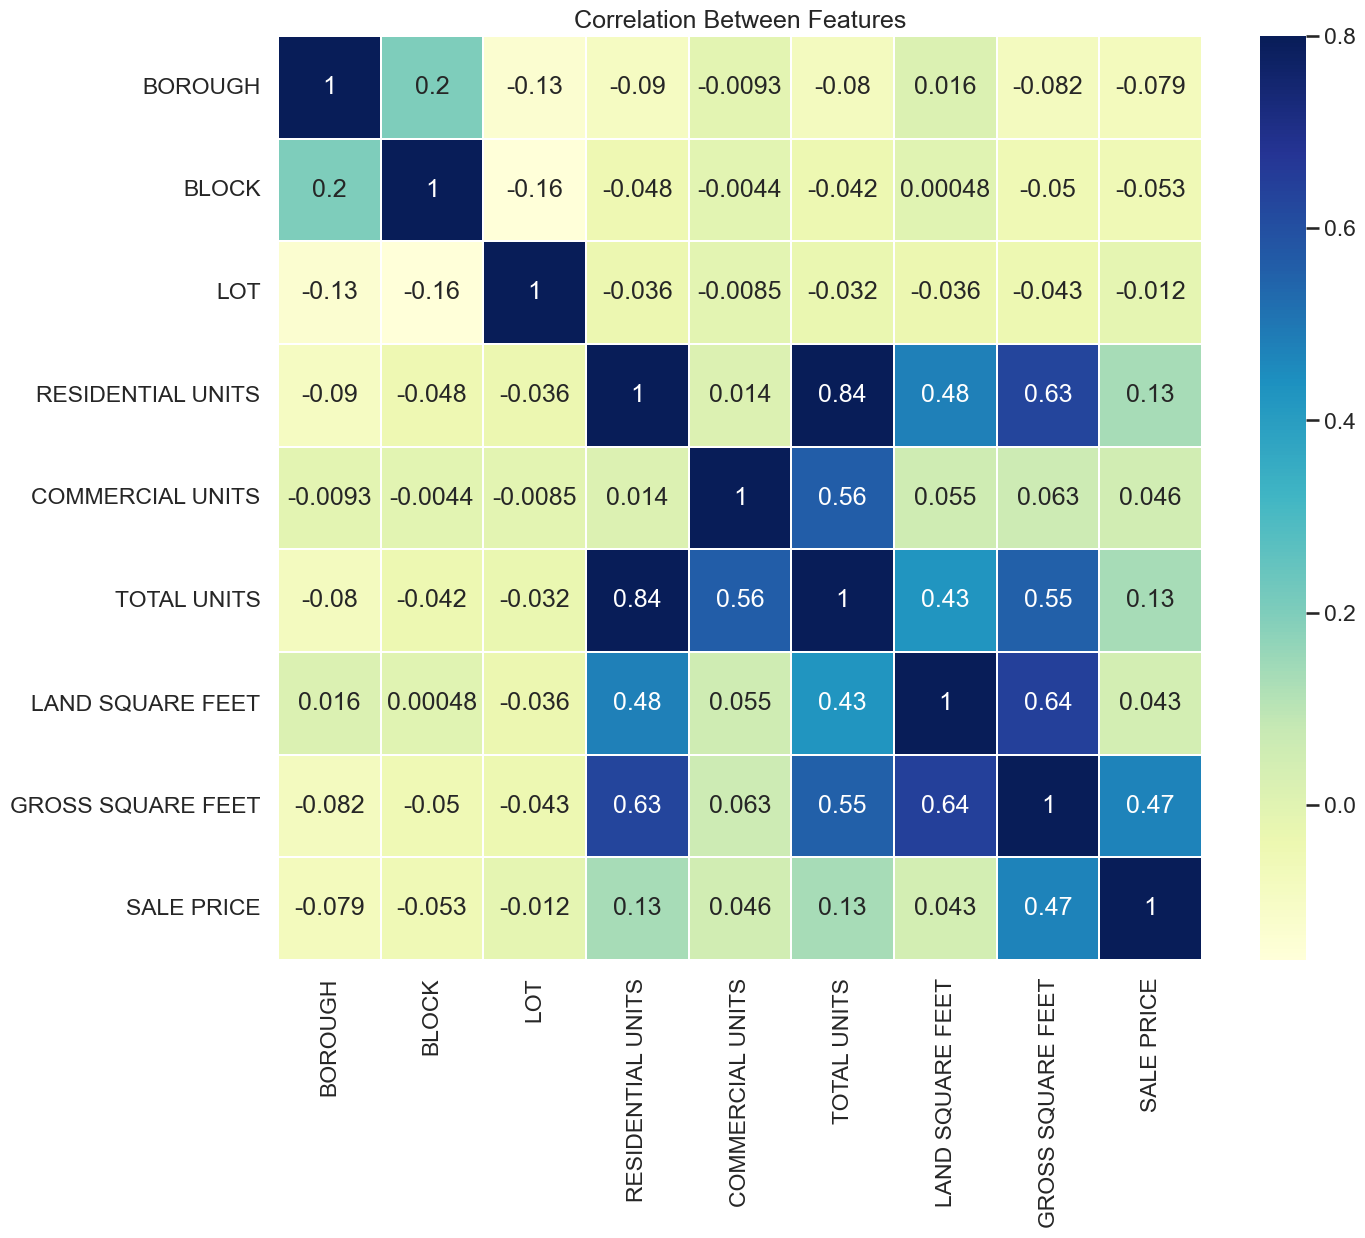

In [77]:
corr=nyc.corr()
plt.figure(figsize=(15, 12))
sns.heatmap(corr, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='YlGnBu',linecolor="white")
plt.title('Correlation Between Features');

Dari uji korelasi Pearson's Correlation Coefficient dan Kendall's Rank Correlation, diketahui bahwa SALE PRICE dan BOROUGH terdapat hubungan antar kedua variabel (saling berkorelasi) namun pada plot Correlation Between Features terlihat bahwa SALE PRICE dan BOROUGH memiliki korelasi yang rendah.

## Kesimpulan

Berdasarkan hasil analisis descriptive dan hypotesis dapat disimpulkan bahwa Harga Penjualan dengan:
* rata-rata tertinggi terdapat di daerah Manhattan sebesar 19,296,640 dan rata-rata terendah terdapat pada daerah Staten Islands sebesar 527,238.
* median tertinggi juga terdapat di daerah Manhattan sebesar 6,500,000 dan terendah terdapat pada daerah Bronx sebesar 371,387.
* range tertinggi terdapat di daerah Manhattan sebesar  2,210,000,000 dan rata-rata terendah terdapat pada daerah Staten Islands sebesar 11,900,000.
* varian tertinggi terdapat di daerah Manhattan sebesar   8,082,664,831,348,758 dan rata-rata terendah terdapat pada daerah Staten Islands sebesar 218,098,842,650.
* standar deviasi tertinggi terdapat di daerah Manhattan sebesar 89,903,640 dan rata-rata terendah terdapat pada daerah Staten Islands sebesar 467,010.
* variabel SALE PRICE tidak berdistribusi normal.
* variabel SALE PRICE dengan BOROUGH memiliki hubungan dalam korelasi yang rendah.